___
# Ciência dos Dados - PROJETO 1

Rodrigo Gatti Coutinho

## TÍTULO DO SEU PROJETO

___
## Introdução

Nesse primeiro projeto, pretendo analisar a relaçao entre a classe social de uma pessoa e o trabalho infantil e como, com isso, a escolaridade pode ser influenciada ou não.

___
## Filtros da base de dados

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [18]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Familia\Documents\insper\ciencia dos dados\DP CD


In [23]:
#Se usar o arquivo descompactado
# pd.read_csv('PES2015csv.csv', sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


In [24]:
dados= dados.loc[:, ["UF","V4816", "V9891", "V4718", "V4745"]]
dados.to_csv("resumo.csv") #faz com que salve em um arquivo no excel

#dados_nao_nulos= dados[pd.notnull(dados.V4801)&pd.notnull(dados.V4728)&pd.notnull(dados.UF)&pd.notnull(dados.V6502)&pd.notnull(dados.V4816)&pd.notnull(dados.V9891)&pd.notnull(dados.V4743)]
#dados_nao_nulos.head()


In [5]:
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories= (['Rondônia', 'Acre','Amazonas', 'Roraima','Pará', 'Amapá','Tocantis', 'Maranhão','Piauí', 'Ceará','Rio Grande do Norte', 'Paraíba','Pernambuco', 'Alagoas','Sergipe', 'Bahia','Minas Gerais', 'Espírito Santo','Rio de Janeiro', 'São Paulo','Paraná', 'Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul','Mato Grosso', 'Goiás' , 'Distrito Federal'])


dados.V4816 = dados.V4816.astype('category')
dados.V4816.cat.categories= (['Agrícola', 'Outras atividades industriais','Indústria de transformação','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades','Atividades maldefinidas'])

dados.V9891 = dados.V9891.astype('category')
dados.V9891.cat.categories= (['Até 9 anos', '10 a 14 anos','15 a 17 anos','18 a 19 anos','20 a 24 anos','25 a 29 anos','30 anos ou mais'])

dados.V4745 = dados.V4745.astype('category')
dados.V4745.cat.categories = ('Sem instrução', 'Fundamental incompleto ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo ','Não determinado','Não aplicável')


dados.loc[(dados.UF=='Rondônia') | (dados.UF=='Acre') | (dados.UF=='Amazonas') | (dados.UF=='Roraima') | (dados.UF=='Pará') | (dados.UF=='Amapá') | (dados.UF=='Tocantins'),'Regiao'] = 'Norte'
dados.loc[(dados.UF=='Maranhão') | (dados.UF=='Piaui') | (dados.UF=='Caerá') | (dados.UF=='Rio Grande do Norte') | (dados.UF=='Paraíba') | (dados.UF=='Pernambuco') | (dados.UF=='Alagoas') | (dados.UF=='Sergipe') | (dados.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados.loc[(dados.UF=='Minas Gerais') | (dados.UF=='Espirito Santo') | (dados.UF=='Rio de Janeiro') | (dados.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados.loc[(dados.UF=='Paraná') | (dados.UF=='Santa Catarina') | (dados.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados.loc[(dados.UF=='Mato Grosso do Sul') | (dados.UF=='Mato Grosso') | (dados.UF=='Goiás') | (dados.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'


dados.head()

,UF,V4816,V9891,V4718,V4745,Regiao
0,Rondônia,"Outros serviços coletivos, sociais e pessoais",10 a 14 anos,800.0,Superior incompleto ou equivalente,Norte
1,Rondônia,Outras atividades,20 a 24 anos,1150.0,Superior incompleto ou equivalente,Norte
2,Rondônia,Administração pública,10 a 14 anos,880.0,Superior completo,Norte
3,Rondônia,Comércio e reparação,Até 9 anos,3000.0,Não determinado,Norte
4,Rondônia,NaN,NaN,NaN,Fundamental incompleto ou equivalente,Norte


In [6]:
dadosfiltrados= dados[(dados.V9891== 'Até 9 anos') | (dados.V9891== '10 a 14 anos')| (dados.V9891== '15 a 17 anos')]
#filtragem da variavel V6502 não esta funcionando

In [7]:
dados1 = pd.DataFrame({'Unidade Federal':dadosfiltrados.UF, "Área de trabalho":dadosfiltrados.V4816, "idade em que começou a trabalhar":dadosfiltrados.V9891 , "rendimento mensal":dadosfiltrados.V4718,"nivel de ensino":dadosfiltrados.V4745, "Região":dadosfiltrados.Regiao })
#dados1= dados1[dados.V4718!=999999999999]
dados1.head()

,Região,Unidade Federal,idade em que começou a trabalhar,nivel de ensino,rendimento mensal,Área de trabalho
0,Norte,Rondônia,10 a 14 anos,Superior incompleto ou equivalente,800.0,"Outros serviços coletivos, sociais e pessoais"
2,Norte,Rondônia,10 a 14 anos,Superior completo,880.0,Administração pública
3,Norte,Rondônia,Até 9 anos,Não determinado,3000.0,Comércio e reparação
7,Norte,Rondônia,15 a 17 anos,Superior incompleto ou equivalente,880.0,Comércio e reparação
11,Norte,Rondônia,15 a 17 anos,Médio incompleto ou equivalente,150.0,Serviços domésticos


In [8]:
#grafico 1
print('Frequências relativas por idade em que começou a trabalhar:')
G1 = (dados1['idade em que começou a trabalhar'].value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Até 9 anos', '10 a 14 anos','15 a 17 anos'])
#print(G1,'\n')

print('Frequências relativas por Área de trabalho:')
G2 = (dados1['Área de trabalho'].value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Agrícola', 'Outras atividades industriais','Indústria de transformação','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades','Atividades maldefinidas'])
#print(G2,'\n')

print('Frequências relativas por Nivel de ensino:')
G3 = (dados1['nivel de ensino'].value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Sem instrução', 'Fundamental incompleto ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo ','Não determinado','Não aplicável'])
#print(G3,'\n')

Frequências relativas por idade em que começou a trabalhar:
Frequências relativas por Área de trabalho:
Frequências relativas por Nivel de ensino:


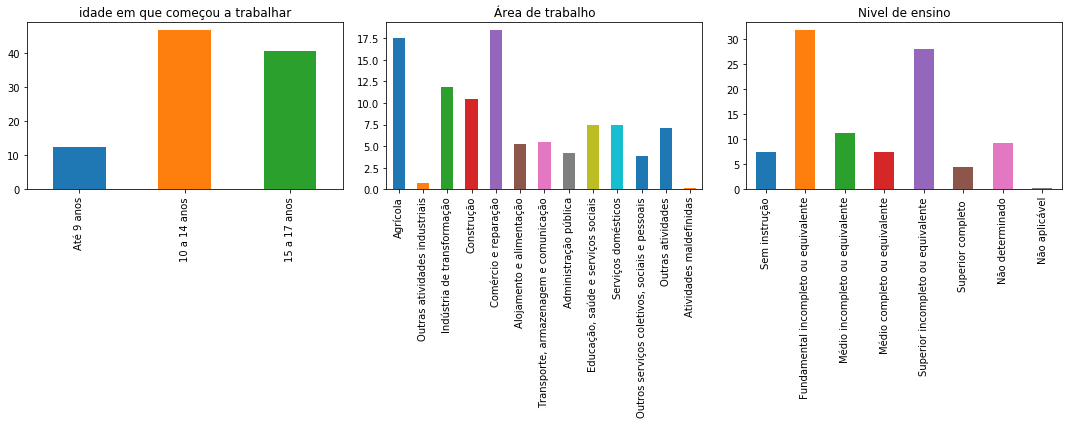

In [9]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(131)
plot = G1.plot(kind='bar',title='idade em que começou a trabalhar')

plt.subplot(132)
plot = G2.plot(kind='bar',title='Área de trabalho')

plt.subplot(133)
plot = G3.plot(kind='bar',title='Nivel de ensino')

plt.tight_layout()
plt.show()

In [10]:
C1=pd.crosstab(dados1['idade em que começou a trabalhar'], dados1['nivel de ensino'], margins=True, rownames=['começou a trabalhar'], colnames=['nivel de ensino'], normalize=True)*100

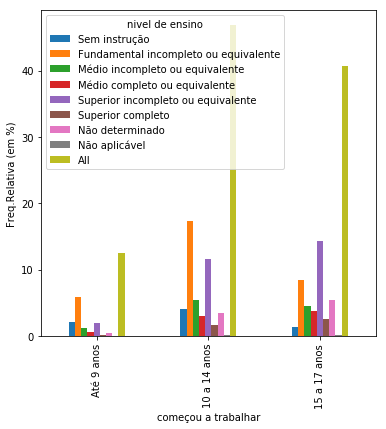

In [11]:
plot = C1.iloc[0:3,].plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [12]:
C2=pd.crosstab(dados1['idade em que começou a trabalhar'],dados1['Área de trabalho'], margins=True, rownames=['começou a trabalhar'], colnames=['Área de trabalho'], normalize=True)*100


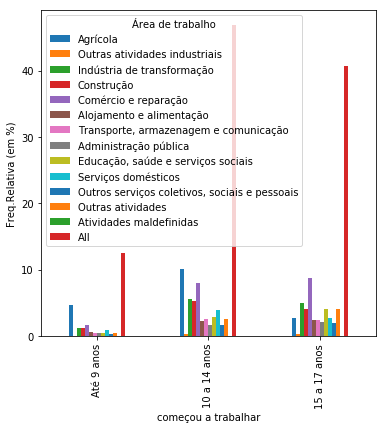

In [13]:
plot = C2.iloc[0:3,].plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [31]:
C3=pd.crosstab(dados1['idade em que começou a trabalhar'],dados1['Região'], margins=True, rownames=['começou a trabalhar'], colnames=['região'], normalize=True)*100

região,Centroeste,Nordeste,Norte,Sudeste,Sul,All
começou a trabalhar,,,,,,
Até 9 anos,1.841178,3.199186,2.017343,3.082028,2.286721,12.426455
10 a 14 anos,5.839091,10.763152,7.136382,13.657898,9.051105,46.447629
15 a 17 anos,5.058323,8.224157,5.248170,14.218034,8.377232,41.125915
18 a 19 anos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20 a 24 anos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25 a 29 anos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30 anos ou mais,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
All,12.738592,22.186495,14.401895,30.957960,19.715058,100.000000


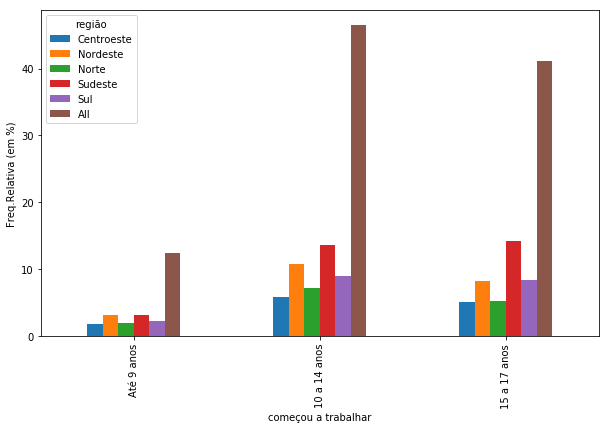

In [15]:
plot = C3.iloc[0:3,].plot(kind='bar',figsize=(10, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [38]:
tabelanorte= dados1[dados1.Região=='Norte']
tabelanordeste= dados1[dados1.Região=='Nordeste']
tabelasudeste= dados1[dados1.Região=='Sudeste']
tabelasul= dados1[dados1.Região=='Sul']
tabelacentroeste= dados1[dados1.Região=='Centroeste']

Text(0.5,0,'renda (em reais)')

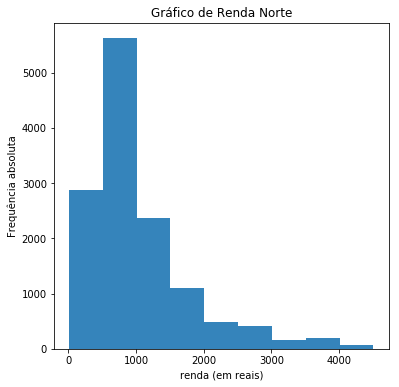

In [44]:
faixa = range(10,5000,500)
renda_Norte = pd.cut(tabelanorte['rendimento mensal'], bins=faixa)
renda_Norte.value_counts(sort=False, normalize=True)*100
plot = tabelanorte['rendimento mensal'].plot.hist(bins=faixa,title='Gráfico de Renda Norte', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')


Text(0.5,0,'renda (em reais)')

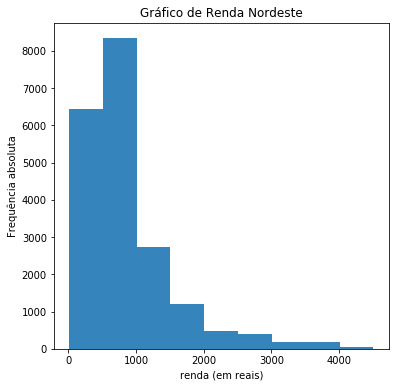

In [48]:
faixa = range(10,5000,500)
renda_Nordeste = pd.cut(tabelanordeste['rendimento mensal'], bins=faixa)
renda_Nordeste.value_counts(sort=False, normalize=True)*100
plot = tabelanordeste['rendimento mensal'].plot.hist(bins=faixa,title='Gráfico de Renda Nordeste', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

Text(0.5,0,'renda (em reais)')

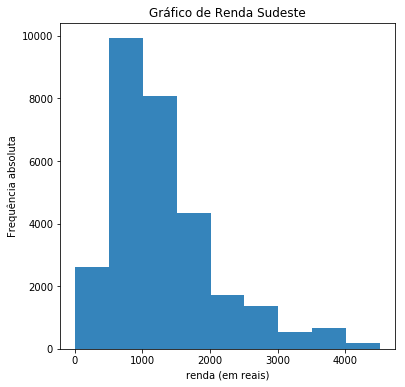

In [47]:
faixa = range(10,5000,500)
renda_sudeste = pd.cut(tabelasudeste['rendimento mensal'], bins=faixa)
renda_sudeste.value_counts(sort=False, normalize=True)*100
plot = tabelasudeste['rendimento mensal'].plot.hist(bins=faixa,title='Gráfico de Renda Sudeste', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

Text(0.5,0,'renda (em reais)')

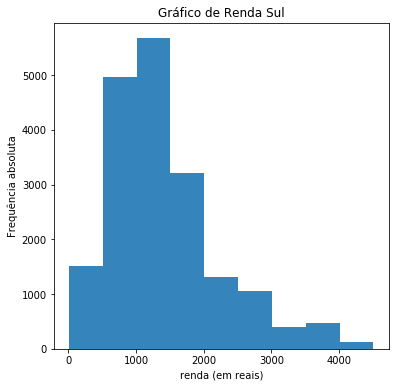

In [46]:
faixa = range(10,5000,500)
renda_sul = pd.cut(tabelasul['rendimento mensal'], bins=faixa)
renda_sul.value_counts(sort=False, normalize=True)*100
plot = tabelasul['rendimento mensal'].plot.hist(bins=faixa,title='Gráfico de Renda Sul', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

Text(0.5,0,'renda (em reais)')

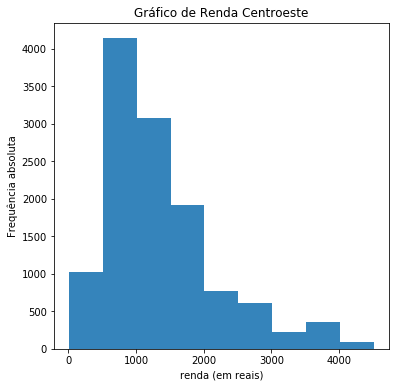

In [45]:
faixa = range(10,5000,500)
renda_centroeste= pd.cut(tabelacentroeste['rendimento mensal'], bins=faixa)
renda_centroeste.value_counts(sort=False, normalize=True)*100
plot = tabelacentroeste['rendimento mensal'].plot.hist(bins=faixa,title='Gráfico de Renda Centroeste', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

___
## Análise e Resultados

Analise sobre area em que começou a trabalhar com a idade em que começou:

    Analisando de uma forma geral, pude perceber, a partir do grafico gerado, que pessoas que comecam a trabalhar na faixa de ate 9 anos e na faixa de 10 a 14 anos, tendem a trabalhar na area de serviços domésticos e as pessoas que comecam a trabalhar na faixa de 15 a 17 anos, vão para a área do comércio e reparação.

Analise sobre o nivel de ensino da pessoa com a idade em que começou a trabalhar:

    Ao analisar o grafico gerado com as devidas variaveis, pude perceber que quando começam a trabalhar ate os 14 anos, o nivel de ensino que prevalece é o fundamental incompleto, ja quando começam entre 15 e 17 anos, o nivel que prevalece é o superior incompleto.

o que ainda falta:
    -grafico melhorado por região
    -
    -mostrar como a idade que a pessoa começou a trabalhar influencia na renda dela
    -fazer a mesma coisa para a PNAD 2011 e depois comparar com os dados encontrados com a de 2015

___
## Conclusão 

Descreva aqui suas conclusões!